# Early Stopping

- models are trained until the validation bbalpha loss hits a minimum
- the model is saved at this point
- the model continues to train until twice the epochs at the last point of saving
    - this makes sure that no new minimimum is reached

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
# dataset = 'mnist' 
dataset = 'cifar10'
# dataset = 'svhn'
results = [pickle.load(open('../../models/bbalpha/keras/saved_models/{}-cnn-alpha0.5-run{}/results.p'.format(dataset, r), 'rb')) for r in range(1, 4)]

## Plot BB-alpha loss and accuracies

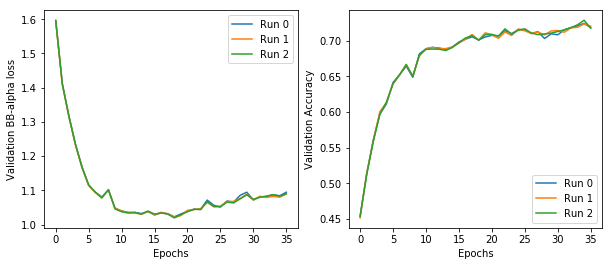

In [3]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
[ax1.plot(r['val_bbalpha_loss'], label='Run {}'.format(ii)) for (ii, r) in enumerate(results)]
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation BB-alpha loss')
[ax2.plot(r['val_avg_acc'], label='Run {}'.format(ii)) for (ii, r) in enumerate(results)]
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation Accuracy')
f.savefig('{}.png'.format(dataset), dpi=600)

In [4]:
print("Epochs of min bbalpha loss")
print([np.argmin(r['val_bbalpha_loss']) for r in results])

Epochs of min bbalpha loss
[18, 18, 18]
